# GDP and Life Expectancy Project

## Project Goals
The primary goal of this project is to demonstrate my knowledge of data analysis and visualization, as learned in the Codecademy Data Science course. More specifically, I would like to use the given data on GDP and Life Expectancy to determine the effects of the 2008 global recession on these variables and their relationship to each other, if any.

I would also like to analyze the data for linearity, and use this to inform whether linear regression would be a good fit to predict future data for life expectancy and GDP.

## Project Outline

### Step 1 - Initiate project
This part is mostly done at the time of writing--I'm including setting up the Github repository for the project, creating the project file, scoping the project, and importing the data from all_data.csv to the project.

### Step 2 - Explore the data and analyze patterns
Examine the data, and compare several variables to examine any changes surrounding the 2008 global recession. Figure out if these results are significant, and revise the direction of inquiry as needed.

### Step 3 - Evaluate results
Decide on the best graphs to include in the final blog post, and outline what to say about each. Determine a thesis for the results.

### Step 4 - Communicate results
Save figure image files, write the blog post based on the outline from step 2, and post it to the WHO website.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

all_data = pd.read_csv('all_data.csv')

In [2]:
# Lets take a lil looksy
print(all_data.head())
print(all_data.columns)
print(all_data.Country.unique())
print(all_data.Year.unique())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


#### Analysis 01
The takeaway: we're looking at Chile, China, Germany, Mexico, the United States of America, and Zimbabwe during the years 2000-2015, a period of 16 years. This is part of the motivation for looking for evidence of the 2008 recession, as it is positioned almost directly in the middle of this span, so we get about the same amount of sense of the before and after.

#### Next step:
Figure out if there are any gaps in the data, and whether we have all years accounted for in all countries

[A side note: I'd like to know why these countries were picked for this data, how the data was collected, where it comes from, whether the source has the data for more countries (essentially, whether Codecademy cherrypicked these countries, or if this was the scope of another project), but that's outside the scope of *this* project, which is more about analyzing the given data.]

In [3]:
# Just renaming so my life isn't a living hell having to type out that life expectancy thing
all_data = all_data.rename(columns={'Country': 'country', 'Year': 'year', 'Life expectancy at birth (years)': 'life_exp', 'GDP': 'gdp'})
print(all_data.head())

  country  year  life_exp           gdp
0   Chile  2000      77.3  7.786093e+10
1   Chile  2001      77.3  7.097992e+10
2   Chile  2002      77.8  6.973681e+10
3   Chile  2003      77.9  7.564346e+10
4   Chile  2004      78.0  9.921039e+10


In [4]:
# Now lets-a make sure no one's missin'
country_list = all_data.country.unique().tolist()
print(country_list)

# Checkin' to make sure there's 16 years for each country
for country in country_list:
    print(len(all_data.year[all_data.country == country]))

print(all_data.info())

['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']
16
16
16
16
16
16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   96 non-null     object 
 1   year      96 non-null     int64  
 2   life_exp  96 non-null     float64
 3   gdp       96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


#### Analysis 02
Looks like we've got 96 full columns--that sounds like a complete dataset! Definitely makes my job easier.

#### Next step:
I'm thinking I'll take a look at some histograms for life expectancy and GDP and see where that leads. Maybe one for the total and one for each country?

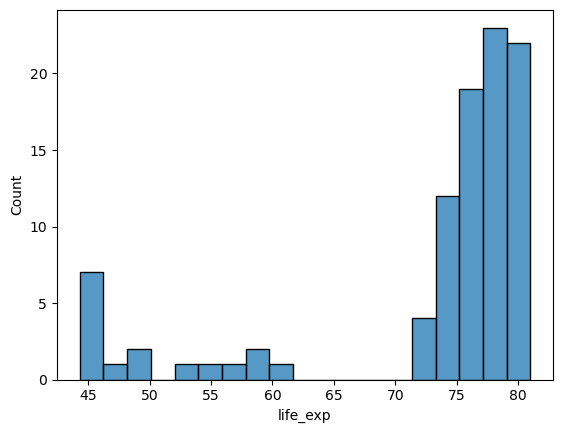

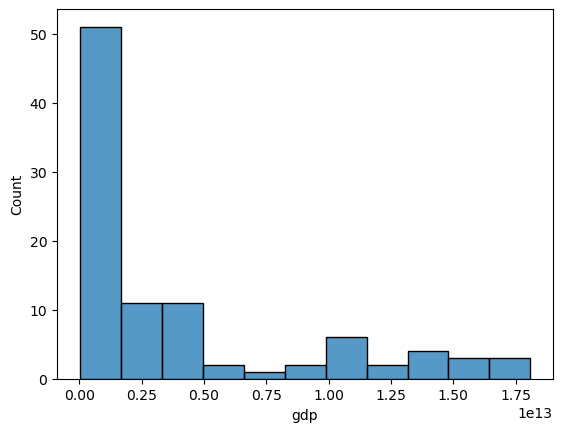

<Figure size 640x480 with 0 Axes>

In [5]:
sns.histplot(all_data.life_exp)
plt.show()
plt.clf()

sns.histplot(all_data.gdp)
plt.show()
plt.clf()

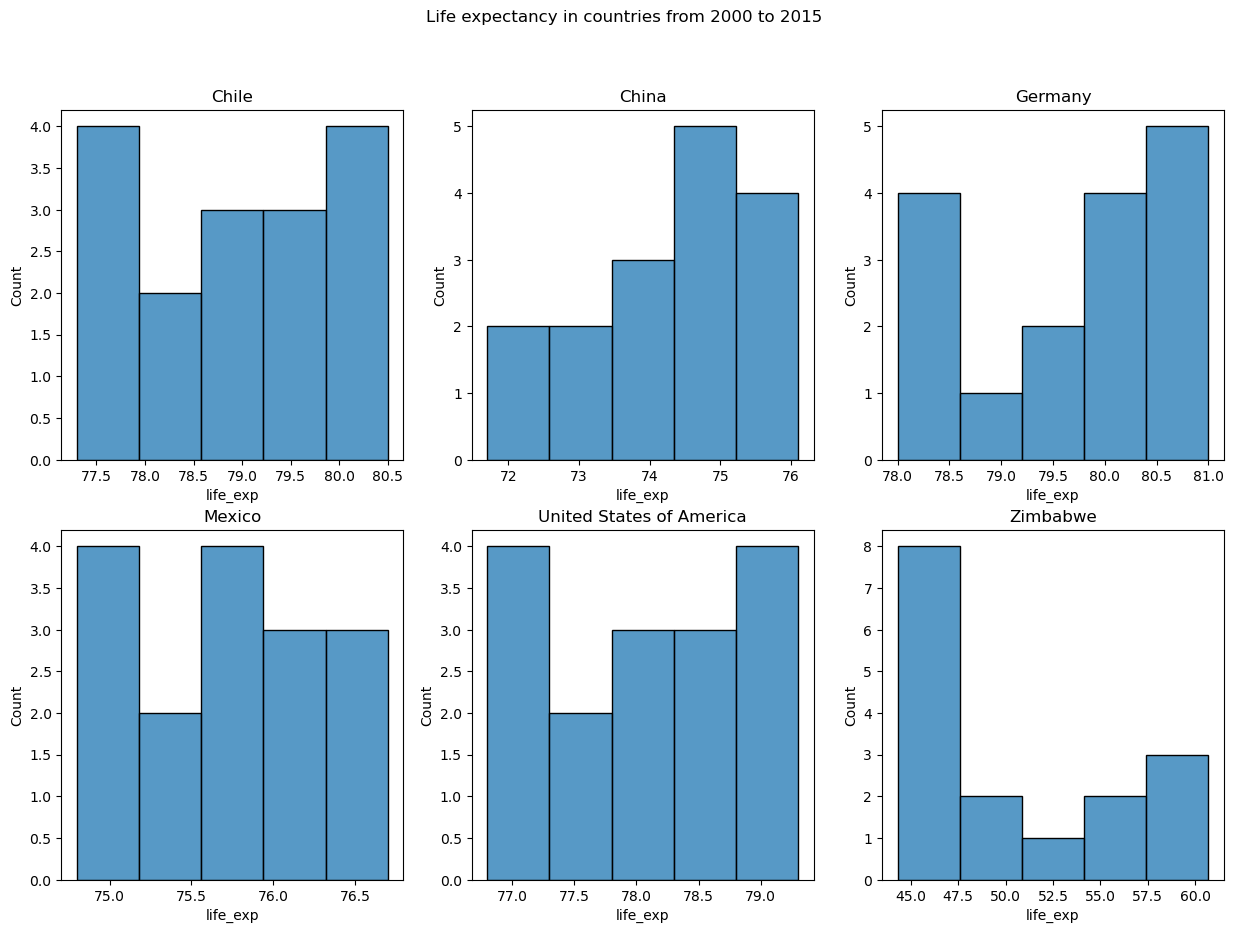

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure(figsize=(15,10))
plt.suptitle("Life expectancy in countries from 2000 to 2015")

for i in range(len(country_list)):
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(all_data.life_exp[all_data.country == country_list[i]])
    ax.set_title(country_list[i])

plt.show()
plt.clf()

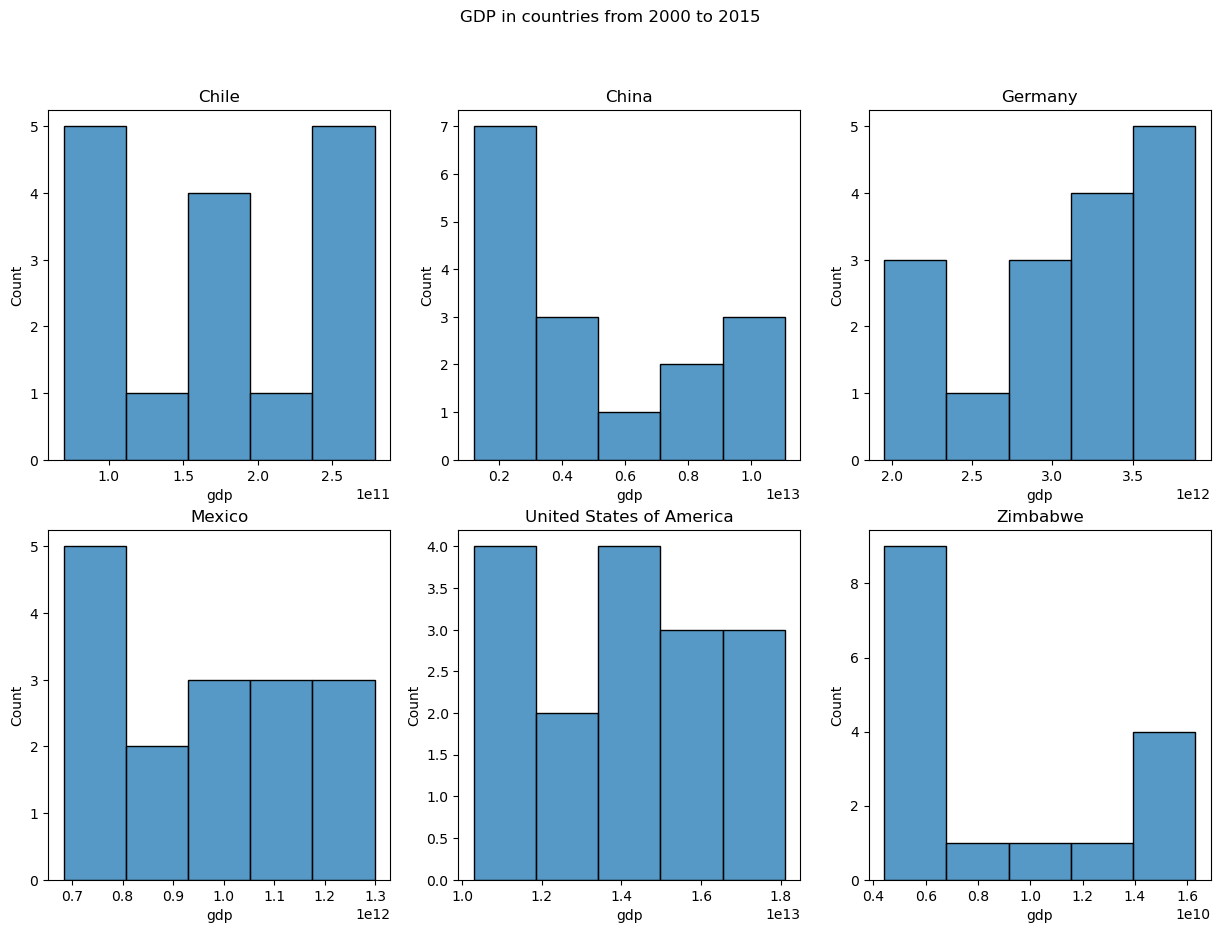

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(15,10))
plt.suptitle("GDP in countries from 2000 to 2015")

for i in range(len(country_list)):
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(all_data.gdp[all_data.country == country_list[i]])
    ax.set_title(country_list[i])

plt.show()
plt.clf()

#### Analysis 03
These are all over the place. My best interpretation: this shows the proportion of years that each country spend towards the higher and lower ends of ITS OWN spectrum of life expectancy and GDP. Not too useful--but what if we aggregate overall by year?

#### Next step:
Separate by year but not by country.

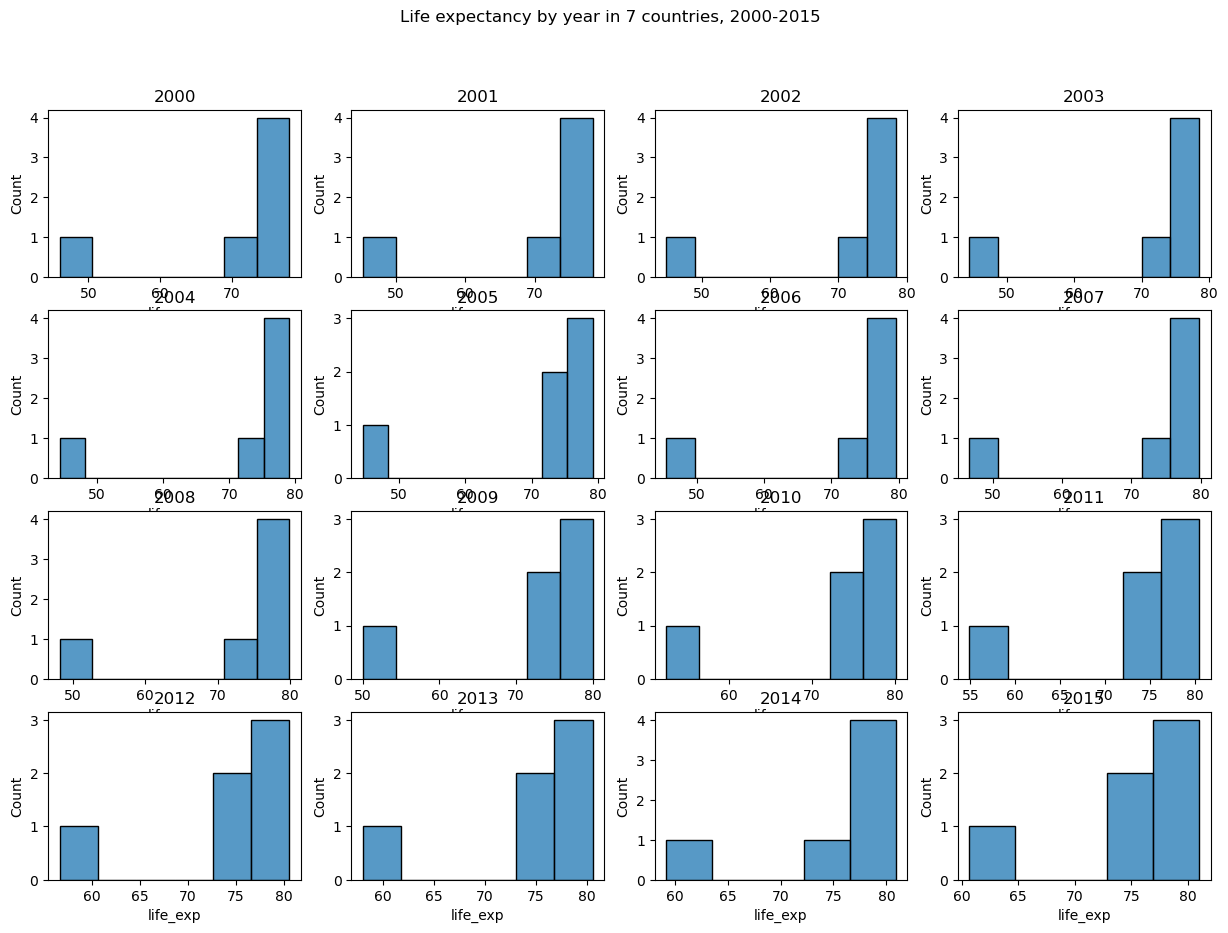

<Figure size 640x480 with 0 Axes>

In [8]:
# This will let us iterate over the years more easily, plus I like lists
year_list = all_data.year.unique().tolist()

plt.figure(figsize=(15,10))
plt.suptitle("Life expectancy by year in 7 countries, 2000-2015")

for i in range(len(year_list)):
    ax = plt.subplot(4, 4, i+1)
    sns.histplot(all_data.life_exp[all_data.year == year_list[i]])
    ax.set_title(year_list[i])

plt.show()
plt.clf()

#### Analysis 04
They all look pretty similar, so I'm not even going to format them. I'm gonna pivot a little bit and do a heatmap and see what variables are correlated and go from there.

C:\Users\Gavin\AppData\Local\Temp\ipykernel_34696\67214384.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(all_data.corr(), center=0, cmap=colors, robust=True)


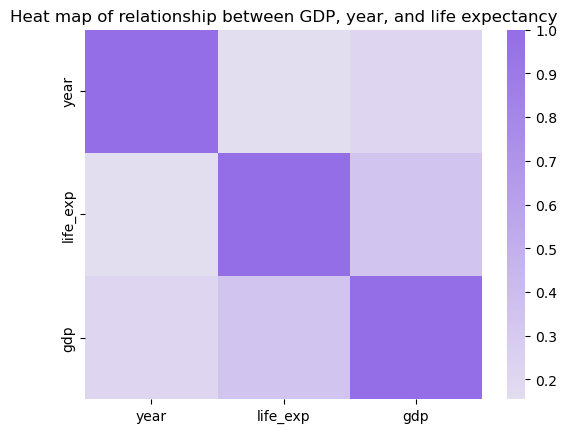

<Figure size 640x480 with 0 Axes>

In [9]:
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(all_data.corr(), center=0, cmap=colors, robust=True)

plt.title("Heat map of relationship between GDP, year, and life expectancy")

plt.savefig("heatmap_gdp_year_life.jpg")
plt.show()
plt.clf()

#### Analysis 05
It's looking here like GDP and Life Expectancy are most related, but it is interesting that GDP is more related to year than life_exp is to year.

#### Next step:
Plot GDP and life_exp over time for each country using a line graph

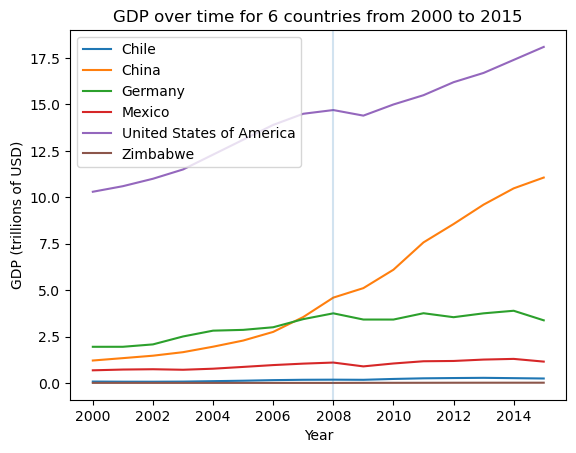

<Figure size 640x480 with 0 Axes>

In [10]:
for i in range(len(country_list)):
    plt.plot(year_list, all_data.gdp[all_data.country == country_list[i]] / 1000000000000)

plt.axvline(x=2008, alpha=0.2)
    
plt.legend(country_list)
plt.title("GDP over time for 6 countries from 2000 to 2015")
plt.xlabel("Year")
plt.ylabel("GDP (trillions of USD)")

plt.savefig('gdp_one_subplot.jpg')
plt.show()
plt.clf()

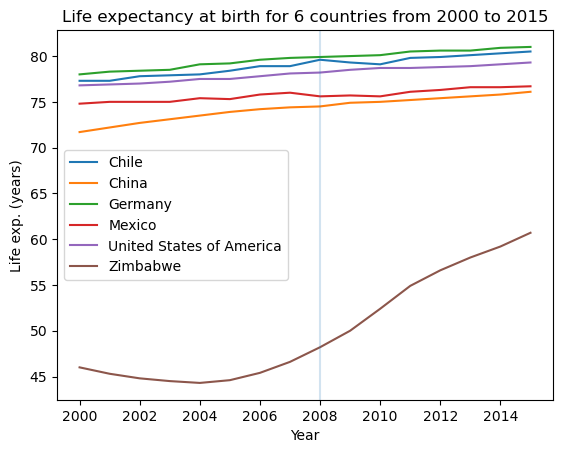

<Figure size 640x480 with 0 Axes>

In [11]:
for i in range(len(country_list)):
    plt.plot(year_list, all_data.life_exp[all_data.country == country_list[i]])

plt.axvline(x=2008, alpha=0.2)
    
plt.legend(country_list)
plt.title("Life expectancy at birth for 6 countries from 2000 to 2015")
plt.xlabel("Year")
plt.ylabel("Life exp. (years)")

plt.savefig('life_one_subplot.jpg')

plt.show()
plt.clf()

#### Analysis 06
Looks like there's something there for GDP (look at the downtick after 2008 for a few countries), but not necessarily for life expectancy.

#### Next step:
Look more into the GDP for each individual country--the difference in scales hurts the data on the lower end of the global GDP range.

In [12]:

skip_year_list = year_list[::2]
#print(skip_year_list)
short_year_list = ["'" + str(year)[-2:] for year in year_list]
label_skip_year_list = short_year_list[::2]
#print(abb_year_list)

color_list = ['C' + str(i) for i in range(len(country_list))]

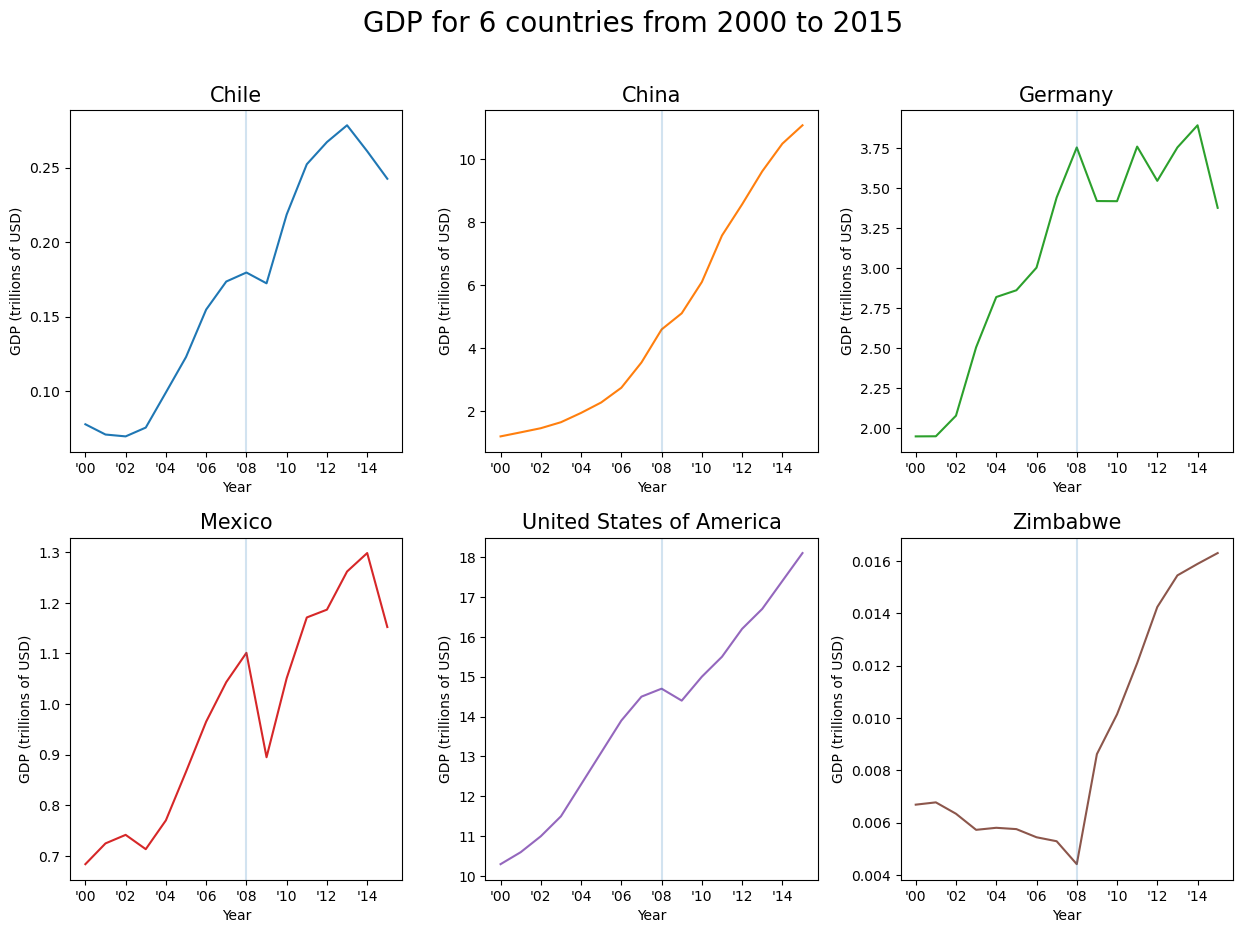

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(15,10))
plt.suptitle("GDP for 6 countries from 2000 to 2015", fontsize=20)

for i in range(len(country_list)):
    ax = plt.subplot(2,3,i+1)
    plt.plot(year_list, all_data.gdp[all_data.country == country_list[i]] / 1000000000000, color=color_list[i])
    plt.axvline(x=2008, alpha=0.2)
    ax.set_title(country_list[i], fontsize=15)
    ax.set_xticks(skip_year_list)
    ax.set_xticklabels(label_skip_year_list)
    plt.xlabel("Year")
    plt.ylabel("GDP (trillions of USD)")

plt.subplots_adjust(wspace=0.25, hspace=0.25)

plt.savefig('gdp_six_subplots.jpg')
plt.show()
plt.clf()

#### Analysis 07
Now we're cooking with oil--it looks like all of the graphs changed somewhat significantly after 2008, with China changing the least (although the rate of change of the GDP clearly changed significantly, but alas I'm bound by how much calculus I know how to implement in Python). Zimbabwe, however, was DECREASING but skyrocketed AFTER 2008. I wonder why, but that's super interesting.

#### Next step:
Do the same thing with life expectancy so we have something to compare this to.

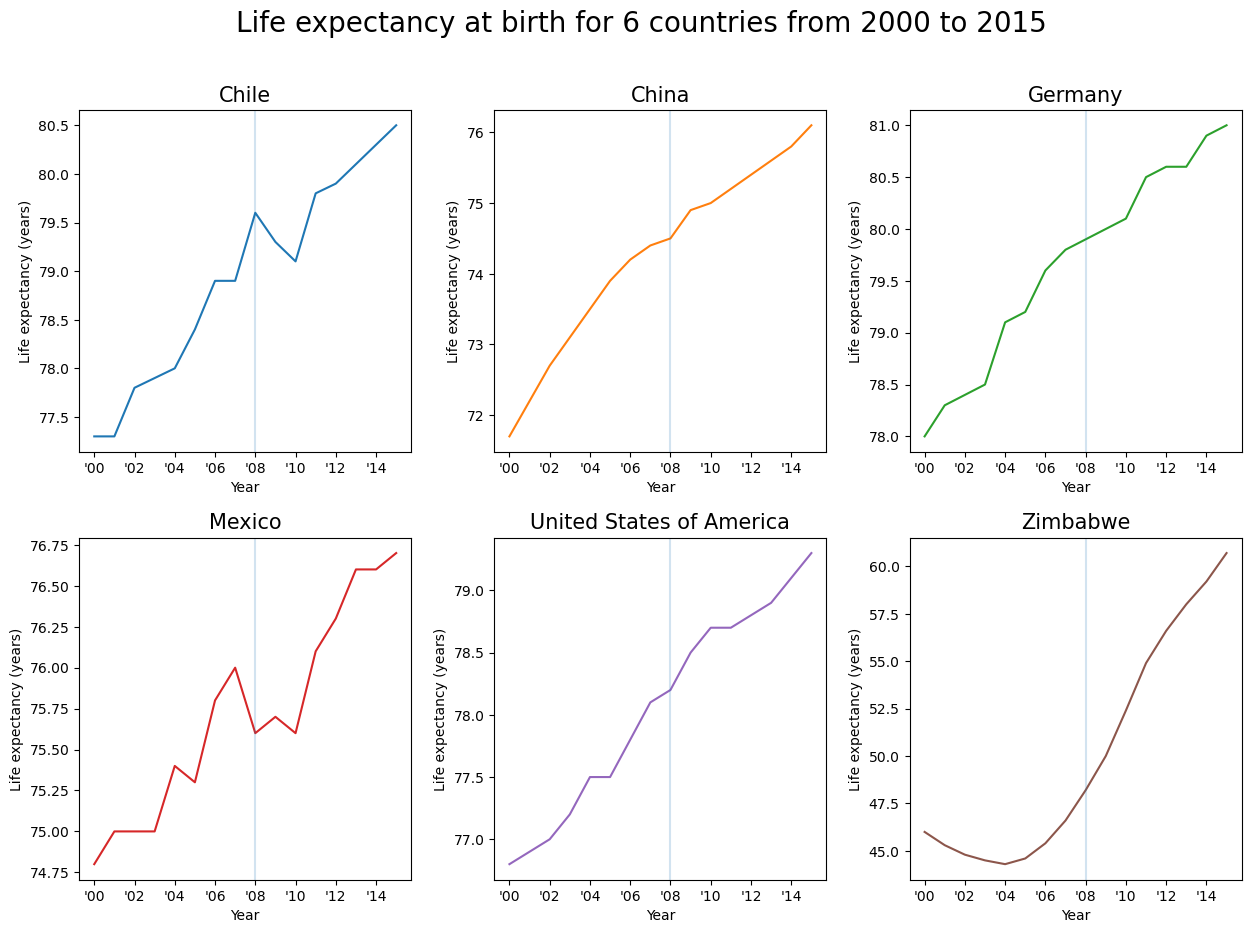

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(15,10))
plt.suptitle("Life expectancy at birth for 6 countries from 2000 to 2015", fontsize=20)

for i in range(len(country_list)):
    ax = plt.subplot(2,3,i+1)
    plt.plot(year_list, all_data.life_exp[all_data.country == country_list[i]], color=color_list[i])
    plt.axvline(x=2008, alpha=0.2)
    ax.set_title(country_list[i], fontsize=15)
    ax.set_xticks(skip_year_list)
    ax.set_xticklabels(label_skip_year_list)
    plt.xlabel("Year")
    plt.ylabel("Life expectancy (years)")

plt.subplots_adjust(wspace=0.25, hspace=0.25)

plt.savefig('life_six_subplots.jpg')
plt.show()
plt.clf()

#### Analysis 08
As expected, harder to find patterns here. Not to say there's nothing to learn, but as it stands I think I'm grasping at straws.

#### Next step:
I'd like to plot life expectancy vs year for all countries in a scatterplot, separating by country for color, to see if any trends arise there.

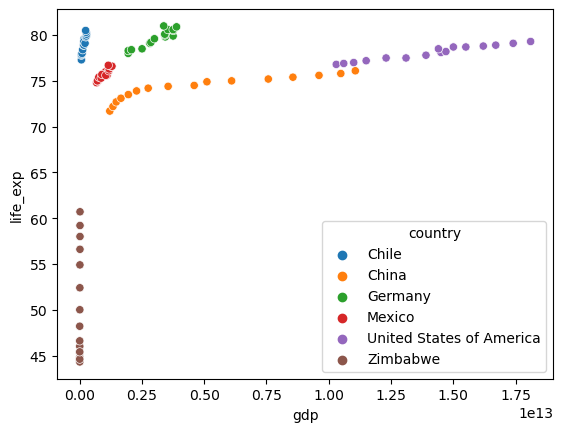

<Figure size 640x480 with 0 Axes>

In [15]:
sns.scatterplot(data=all_data, x='gdp', y='life_exp', hue='country')
plt.show()
plt.clf()

#### Analysis 09
Not as revelatory as I'd hoped, but it is interesting to note that, for instance, the USA showed similar growth in life expectancy to Chile but grew a lot more in GDP--evidence that these aren't necessarily linked all that closely.

#### Next step:
Trying life expectancy vs time as a scatterplot with country coded by color

<Axes: xlabel='year', ylabel='life_exp'>

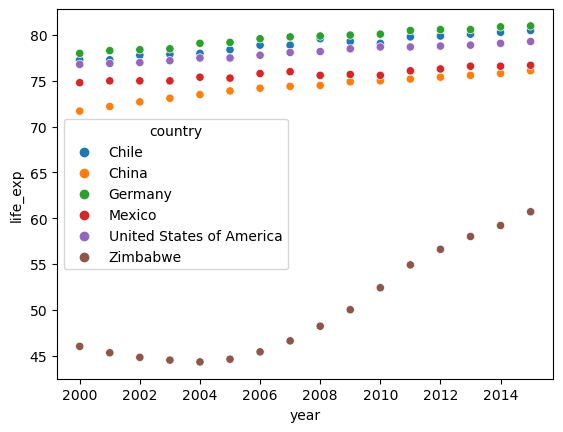

In [16]:
sns.scatterplot(data=all_data, x='year', y='life_exp', hue='country')

#### Analysis 10
I'll call it there--nothing super interesting here, and I realized after the fact that basically made this exact same graph earlier but as a line plot. I'm going to skip the regression idea I had at the beginning, because in hindsight I think that would make for almost a completely different project.

## Conclusion
The most interesting find in this analysis was the hit taken by most GDPs after 2008 and the global recession. Notably, Zimbabwe took a striking uptern after 2008, which I wouldn't have expected. This could be for a few reasons: potentially, global companies could have turned to Zimbabwe for cheap labor, bringing in more money. Alternately, since the scale for GDP is in USD, I'm compelled by the possibility that while the USD went up in value, there wasn't much economic impact on Zimbabwe during the recession, and so rapid inflation of the US Dollar may have caused Zimbabwe currency to skyrocket in value. Anything conclusive, though, is a question for another time.